# Comparison of different Classification Algorithms



In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from main import aggregate_data, normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.testDataImporter import TestDataImporter

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
importer = TestDataImporter('data/testset.csv')
y_train = np.array(importer.trainset.classification)
y_test = np.array(importer.testset.classification)

In [4]:
metrics = np.array(list(metricCollection.keys()))
metrics

array(['forks_count', 'avg_entropy', 'open_issue_count', 'watcher_count',
       'is_io_page', 'file_folder_ratio', 'file_count', 'up_to_dateness',
       'repo_size', 'html_count', 'avg_folder_depth'], 
      dtype='<U17')

In [5]:
data_train = aggregate_data(importer.trainset.repos)
data_train = data_train[metrics]
data_train = normalize_data(data_train)
data_train[:5]

,avg_entropy,open_issue_count,watcher_count,is_io_page,file_folder_ratio,file_count,up_to_dateness,repo_size,html_count,avg_folder_depth
0,0.251590,0.641663,0.770764,0.0,0.330773,0.405086,0.026821,0.752917,0.0,0.253733
1,0.270911,0.151630,0.753491,0.0,0.084179,0.136859,0.708447,0.370083,0.0,0.333086
2,0.431880,0.000000,0.000000,0.0,0.275341,0.484467,0.597203,0.735055,0.0,0.236519
3,0.232237,0.000000,0.000000,0.0,0.169776,0.344582,0.498483,0.373685,0.0,0.736634
4,0.259969,0.000000,0.000000,0.0,0.210574,0.349585,0.873993,0.508795,0.0,0.534729


In [6]:
data_test = aggregate_data(importer.testset.repos)
data_test = data_test[metrics]
data_test = normalize_data(data_test)
data_test[:5]

,avg_entropy,open_issue_count,watcher_count,is_io_page,file_folder_ratio,file_count,up_to_dateness,repo_size,html_count,avg_folder_depth
0,0.564294,0.150190,0.421838,0.0,0.191077,0.252792,0.539362,0.747260,0.080901,0.310194
1,0.741162,0.000000,0.000000,0.0,0.020757,0.197237,0.877016,0.723308,0.000000,0.339471
2,0.769716,0.000000,0.073646,0.0,0.014088,0.167862,0.971735,0.408197,0.000000,0.359101
3,0.527382,0.834246,0.073646,0.0,0.048594,0.123329,0.766765,0.763555,0.000000,0.282112
4,0.516772,0.555771,0.441875,0.0,0.162831,0.538326,0.201886,0.724402,0.209125,0.804519


## Helper

In [7]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def analyze_results(model):
    print('acc train:', model.score(data_train, y_train))
    print('acc test:', model.score(data_test, y_test))
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(data_test)), np.unique(y_test))

In [9]:
def null_acc(y):
    return max([len(y[y == x]) for x in np.unique(y)]) / len(y)

In [10]:
print('acc train:', null_acc(y_train))
print('acc test:', null_acc(y_test))

acc train: 0.3951890034364261
acc test: 0.33544303797468356


## Logistic Regression

In [11]:
logreg = sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2)
logreg.fit(data_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
logreg.coef_

array([[ 0.23131535, -0.78052981,  1.50794732, -0.7798473 ,  0.58066393,
        -0.76424357, -0.82794221, -0.01958076, -1.46240552, -1.11481117],
       [-1.08792414,  0.69730384, -1.35864876,  0.72379702,  0.92781887,
         1.24440526, -1.02024522,  0.88581025,  0.80221281,  0.32329657],
       [ 1.27489015,  0.01350046, -0.20146922, -0.31592908, -0.51543289,
        -0.27088768, -0.27682725,  0.44904868, -0.9447753 , -1.5347631 ],
       [-0.16124323, -0.33207305,  1.73161734, -0.73444736, -0.51743371,
        -0.60990646, -0.40945021, -0.05599955,  0.39939788, -0.23185739],
       [-0.59961473, -0.36113499, -0.98032865, -0.86054661, -0.26317945,
         0.57184665,  0.12251592, -0.35325405,  0.52200145, -0.39249131],
       [-0.44700727, -0.11016427, -0.98400958, -0.81380782, -1.29968125,
        -1.91152506,  0.52691763, -3.07332552, -0.81696927,  0.50947277],
       [ 0.10875977, -0.52409285, -1.06569495,  1.41055091, -0.21943799,
        -0.35935403, -1.3913587 , -0.17530336

acc train: 0.494845360825
acc test: 0.436708860759
Confusion matrix, without normalization
[[ 2 14  0  0  0  2  0]
 [ 0 53  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 1 18  0  0  0  2  0]
 [ 0 19  0  0  0  5  0]
 [ 0  7  0  0  0 14  0]
 [ 0  6  0  0  0  1  0]]


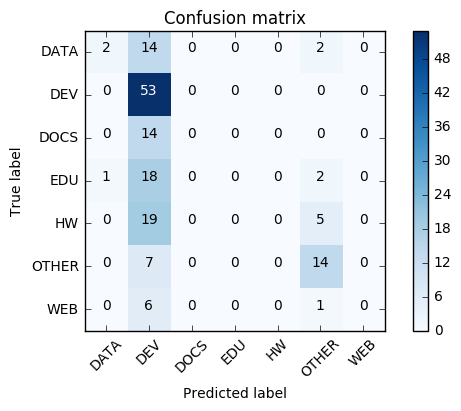

In [13]:
analyze_results(logreg)

## SVM

In [14]:
svm = sklearn.svm.SVC(C=20.0, random_state=1337)
svm.fit(data_train, y_train)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)

acc train: 0.529209621993
acc test: 0.436708860759
Confusion matrix, without normalization
[[ 3 10  2  0  0  3  0]
 [ 2 46  0  0  0  5  0]
 [ 4  9  0  0  0  1  0]
 [ 6  8  0  2  0  5  0]
 [ 0 14  0  1  0  9  0]
 [ 0  2  0  1  0 18  0]
 [ 0  6  0  0  0  1  0]]


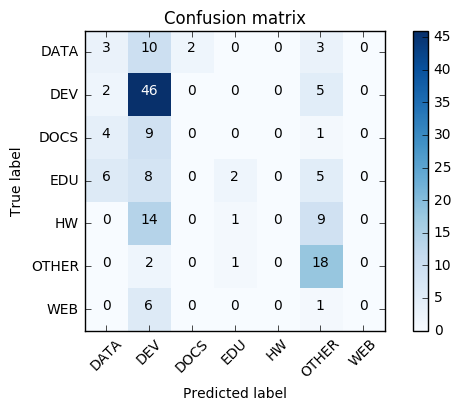

In [15]:
analyze_results(svm)

## DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(data_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

acc train: 0.993127147766
acc test: 0.303797468354
Confusion matrix, without normalization
[[ 2  6  7  1  0  1  1]
 [ 3 23 10 10  0  3  4]
 [ 0  7  1  3  0  2  1]
 [ 4  3  4  5  1  4  0]
 [ 1 10  0  2  1  7  3]
 [ 0  1  0  3  4 13  0]
 [ 0  1  0  2  0  1  3]]


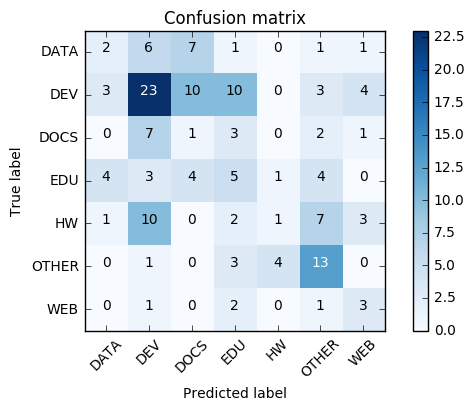

In [18]:
analyze_results(dtc)

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=1337)
rf.fit(data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1337,
            verbose=0, warm_start=False)

acc train: 0.993127147766
acc test: 0.455696202532
Confusion matrix, without normalization
[[ 4  9  4  1  0  0  0]
 [ 0 45  5  0  2  0  1]
 [ 1 10  2  1  0  0  0]
 [ 3 10  3  3  0  2  0]
 [ 1 14  1  1  1  4  2]
 [ 0  4  1  0  0 14  2]
 [ 0  4  0  0  0  0  3]]


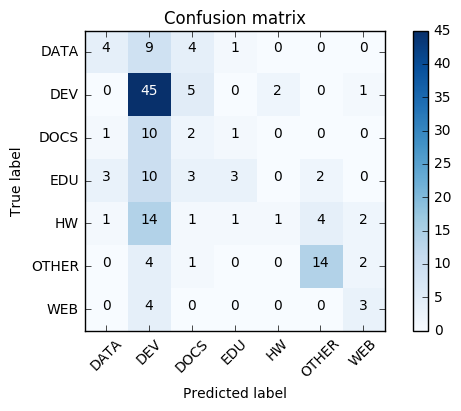

In [20]:
analyze_results(rf)

## NN

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
mlp = MLPClassifier(max_iter=200, hidden_layer_sizes=(100,), random_state=1337)
mlp.fit(data_train, y_train)

/Users/mbornstein/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1337,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

acc train: 0.546391752577
acc test: 0.430379746835
Confusion matrix, without normalization
[[ 4  5  7  0  0  2  0]
 [ 0 44  7  0  0  2  0]
 [ 2  8  4  0  0  0  0]
 [ 4 11  3  0  0  3  0]
 [ 0 12  4  1  0  7  0]
 [ 0  3  1  1  0 16  0]
 [ 0  6  0  0  0  1  0]]


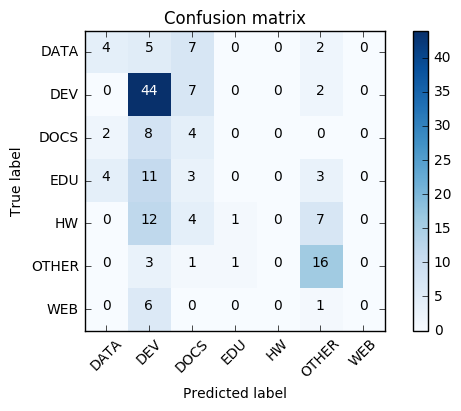

In [23]:
analyze_results(mlp)

## Two Step Stuff

In [24]:
from TwoStepClassifier import TwoStepClassifier

In [25]:
tsc = TwoStepClassifier(
    sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2),
    RandomForestClassifier(n_estimators=100, random_state=1337)
)
tsc.fit(data_train, y_train)

0.154639175258
1.0


In [26]:
tsc.score(data_test, y_test)

['      ' '      ' '      ' '      ' 'DEV' '      ' '      ' '      '
 '      ' 'DEV' '      ' '      ' '      ' 'DEV' 'DEV' '      ' '      '
 '      ' '      ' '      ' 'DEV' '      ' '      ' '      ' '      '
 '      ' '      ' '      ' '      ' '      ' '      ' 'DEV' '      '
 '      ' '      ' 'DEV' '      ' '      ' '      ' '      ' 'DEV' '      '
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 '      ' '      ' '      ' '      ' 'DEV' '      ' 'DEV' '      ' '      '
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 '      ' '      ' '      ' '      ' '      ' 'DEV' '      ' '      '
 '      ' '      ' '      ' '      ' 'DEV' '      ' '      ' '      '
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 'DEV' '      ' '      ' '      ' '      ' 'DEV' 'DEV' '    

0.33544303797468356

['DEV' '      ' 'DEV' 'DEV' '      ' '      ' '      ' '      ' 'DEV'
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' 'DEV'
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 '      ' '      ' '      ' 'DEV' '      ' '      ' 'DEV' '      ' '      '
 'DEV' 'DEV' '      ' '      ' '      ' 'DEV' '      ' '      ' '      '
 'DEV' '      ' 'DEV' '      ' 'DEV' 'DEV' '      ' '      ' 'DEV' '      '
 'DEV' 'DEV' 'DEV' 'DEV' 'DEV' '      ' '      ' '      ' '      ' 'DEV'
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 'DEV' '      ' '      ' '      ' 'DEV' '      ' '      ' '      ' '      '
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 'DEV' '      ' '      ' '      ' 'DEV' 'DEV' 'DEV' '      ' 'DEV' '      '
 '      ' '      ' '      ' '      ' '      ' '      ' '      ' '      '
 '      ' '      ' 'DEV' '      ' '      ' 'DEV' '      ' 'DEV' '      '
 '      ' '      ' '      ' 'DEV' '      ' 'D

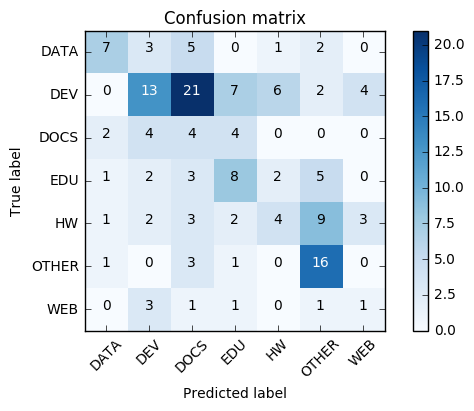

In [27]:
analyze_results(tsc)